# Compare data

In [1]:
import pandas as pd

In [2]:
# import data
dir = '../infrastructure/original/'
filename = 'Roads_InfoAboutEachLRP.csv'
df_roadinfo = pd.read_csv(dir + filename)

In [3]:
# import data
dir = '../infrastructure/interpolated_by_teacher/'
filename = 'BMMS_overview.xlsx'
df_overview = pd.read_excel(dir + filename)

In [4]:
df_overview

,road,km,type,LRPName,name,length,condition,structureNr,roadName,chainage,width,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc
0,N1,1.800,Box Culvert,LRP001a,.,11.30,A,117861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,1.800,19.5,2005.0,2.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.698739,90.458861,interpolate
1,N1,4.925,Box Culvert,LRP004b,.,6.60,A,117862,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,4.925,35.4,2006.0,1.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.694664,90.487775,interpolate
2,N1,8.976,PC Girder Bridge,LRP008b,Kanch pur Bridge.,394.23,A,119889,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,8.976,NaN,NaN,NaN,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.705060,90.523214,interpolate
3,N1,10.880,Box Culvert,LRP010b,NOYAPARA CULVERT,6.30,A,112531,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.880,12.2,1992.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.694391,90.537574,interpolate
4,N1,10.897,Box Culvert,LRP010c,ADUPUR CULVERT,6.30,A,112532,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.897,12.2,1984.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.694302,90.537707,interpolate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20410,Z8806,83.728,Box Culvert,LRP083a,.,1.78,D,110470,Lebukhali-Dumki-Boga-Bauphal-Kalaiya-Dashmina-...,83.728,7.6,1980.0,1.0,Barisal,Patuakhali,Barguna,Barguna,22.183448,90.299962,interpolate
20411,Z8810,3.981,Steel Beam & RCC Slab,LRP003b,.,27.20,D,113458,Bakerganj-Padrishibpur-Kathaltali-Subidkhali-B...,3.981,3.2,1979.0,5.0,Barisal,Barisal,Barisal,Barisal-1,22.519353,90.310063,interpolate
20412,Z8814,20.730,Baily with Steel Deck,LRP020b,Kalbari Bridge,30.50,D,121147,Barguna (Dakhin Ramna Kheya Ghat)-Dewatala-Mat...,20.730,NaN,NaN,NaN,Barisal,Barisal,Pirojpur,Kawkhali,22.282704,89.968512,interpolate
20413,Z8910,28.880,RCC Girder Bridge,LRP028a,Narainpur Bridge,9.50,D,119249,Barisal (Bairagirpool)-Tumchar-Bauphaul Road,28.880,NaN,NaN,NaN,Barisal,Patuakhali,Patuakhali,Patuakhali,22.510650,90.535314,interpolate


In [10]:
# Find rows that are in df_original but not in df_cleaned
diff_info_to_overview = pd.concat([df_roadinfo.lrp, df_overview.LRPName]).drop_duplicates(keep=False)

# Find rows that are in df_cleaned but not in df_original
diff_overview_to_info = pd.concat([df_overview.LRPName, df_roadinfo.lrp]).drop_duplicates(keep=False)


In [8]:
print("Rows in road_info but not in bridge_overview:")
print(diff_info_to_overview)

Rows in road_info but not in bridge_overview:
471      LRP204c
472      LRP204d
473      LRP204e
474      LRP204f
483      LRP207c
          ...   
15741    LRP031f
17750    LRP149f
19382    LRP449f
19401    LRP288b
19417    LRP098c
Length: 661, dtype: object


In [11]:
print("\nRows in bridge_overview but not in road_info:")
print(diff_overview_to_info)


Rows in bridge_overview but not in road_info:
138      LRP208d
142      LRP210d
169      LRP245b
176      LRP252c
190      LRP282c
          ...   
47244    LRP015i
48334    LRP022g
50981    LRP050e
51014    LRP063d
51015    LRP063e
Length: 661, dtype: object


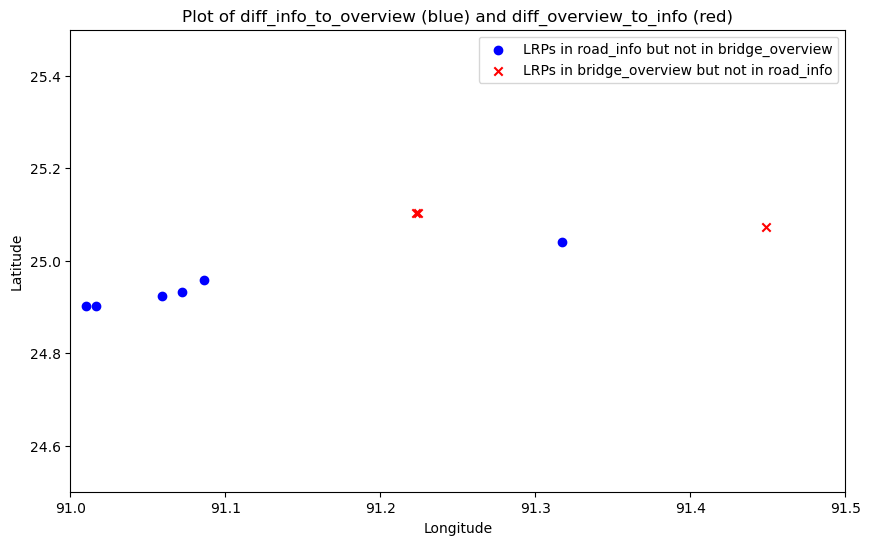

In [18]:
# plot the data (lat and lon) of diff_info_to_overview and diff_overview_to_info
import matplotlib.pyplot as plt

# Filter the rows in df_roadinfo that match diff_info_to_overview
filtered_info_to_overview = df_roadinfo[df_roadinfo['lrp'].isin(diff_info_to_overview)]

# Filter the rows in df_roadinfo that match diff_overview_to_info
filtered_overview_to_info = df_overview[df_overview['LRPName'].isin(diff_overview_to_info)]

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(filtered_info_to_overview['lon'], filtered_info_to_overview['lat'], c='blue', marker='o', label='LRPs in road_info but not in bridge_overview')
plt.scatter(filtered_overview_to_info['lon'], filtered_overview_to_info['lat'], c='red', marker='x', label='LRPs in bridge_overview but not in road_info')

'''# Annotate the points with LRP ID
for i, row in filtered_info_to_overview.iterrows():
    plt.annotate(row['lrp'], (row['lon'], row['lat']), fontsize=8, color='blue')
for i, row in filtered_overview_to_info.iterrows():
    plt.annotate(row['LRPName'], (row['lon'], row['lat']), fontsize=8, color='red')
'''

# set limit of the axis
plt.xlim(91, 91.5)
plt.ylim(24.5, 25.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Plot of diff_info_to_overview (blue) and diff_overview_to_info (red)')
plt.legend()
plt.show()

In [16]:
# find cells in df_original.lrp that has 'a' at the end
df_original[df_original.lrp.str.endswith('a')]

,road,chainage,lrp,lat,lon,type,name
1,N1,0.814,LRPSa,23.702917,90.450417,Culvert,Box Culvert
5,N1,2.130,LRP002a,23.697361,90.461667,Culvert,Box culvert
8,N1,4.175,LRP004a,23.693805,90.480527,"SideRoad,Right",Road to Narayanganj(R111)
12,N1,7.181,LRP007a,23.697916,90.509278,CrossRoad,"R110,Left to Demra, Right to Narayanganj"
14,N1,8.011,LRP008a,23.702111,90.515778,Bridge,Kachpur bridge
...,...,...,...,...,...,...,...
52193,Z8943,1.190,LRP001a,21.426472,90.839305,Culvert,Box Culvert
52195,Z8943,2.562,LRP002a,22.423694,90.826472,Culvert,Box Culvert
52197,Z8943,3.379,LRP003a,22.423222,90.819138,Culvert,Box Culvert
52202,Z8943,6.706,LRP006a,22.428666,90.788416,"SideRoad,Left",Z8948 to Khaserhat


In [20]:
# find cells in df_original.lrp that has 'a' at the end
df_cleaned[df_cleaned.lrp.str.endswith('a')]

,road,chainage,lrp,lat,lon,gap,type,name
1,N1,0.814,LRPSa,23.702917,90.450417,NaN,Culvert,Box Culvert
5,N1,2.130,LRP002a,23.697361,90.461667,NaN,Culvert,Box culvert
8,N1,4.175,LRP004a,23.693805,90.480527,NaN,"SideRoad,Right",Road to Narayanganj(R111)
12,N1,7.181,LRP007a,23.697916,90.509278,NaN,CrossRoad,"R110,Left to Demra, Right to Narayanganj"
14,N1,8.011,LRP008a,23.702111,90.515778,BS,Bridge,Kachpur bridge
...,...,...,...,...,...,...,...,...
51331,Z8943,1.190,LRP001a,22.426472,90.839305,NaN,Culvert,Box Culvert
51333,Z8943,2.562,LRP002a,22.423694,90.826472,NaN,Culvert,Box Culvert
51335,Z8943,3.379,LRP003a,22.423222,90.819138,NaN,Culvert,Box Culvert
51340,Z8943,6.706,LRP006a,22.428666,90.788416,NaN,"SideRoad,Left",Z8948 to Khaserhat


In [17]:
# find cells in df_original.lrp that has 'a' at the end
df_original[df_original.lrp.str.endswith('b')]

,road,chainage,lrp,lat,lon,type,name
2,N1,0.822,LRPSb,23.702778,90.450472,CrossRoad,Intersection with Z1101
15,N1,8.429,LRP008b,23.704583,90.518833,Bridge,Bridge end
20,N1,9.963,LRP010b,23.699861,90.530722,Culvert,Box culvert
24,N1,11.313,LRP011b,23.692277,90.541055,Culvert,Box culvert
27,N1,11.771,LRP012b,23.691055,90.545139,Bridge,Bridge end
...,...,...,...,...,...,...,...
52174,Z8916,3.612,LRP003b,22.618249,90.690555,Bridge,End of bridge
52188,Z8916,11.185,LRP011b,22.597472,90.743000,"Turnoff,Right",Turn off Right
52198,Z8943,3.967,LRP003b,22.423972,90.813611,Culvert,Box Culvert
52203,Z8943,6.712,LRP006b,22.428722,90.788416,Bridge,Start of Bridge


In [18]:
df_original[df_original.type.str.endswith('Culvert')]

,road,chainage,lrp,lat,lon,type,name
1,N1,0.814,LRPSa,23.702917,90.450417,Culvert,Box Culvert
5,N1,2.130,LRP002a,23.697361,90.461667,Culvert,Box culvert
19,N1,9.615,LRP010a,23.701528,90.528194,Culvert,Box culvert
20,N1,9.963,LRP010b,23.699861,90.530722,Culvert,Box culvert
21,N1,10.377,LRP010c,23.697416,90.533777,Culvert,Box culvert
...,...,...,...,...,...,...,...
52191,Z8943,0.275,LRPSa,22.426416,90.846833,Culvert,Box Culvert
52193,Z8943,1.190,LRP001a,21.426472,90.839305,Culvert,Box Culvert
52195,Z8943,2.562,LRP002a,22.423694,90.826472,Culvert,Box Culvert
52197,Z8943,3.379,LRP003a,22.423222,90.819138,Culvert,Box Culvert


In [21]:
# create a function to sum to numbers
def sum_numbers(a, b):
    return a + b

In [23]:
# compare the two dataframes by comparing the lrp column
df_original.reset_index(drop=True, inplace=True)
df_cleaned.reset_index(drop=True, inplace=True)
df_original.lrp == df_cleaned.lrp

ValueError: Can only compare identically-labeled Series objects